In [ ]:
!pip install boto3
!pip install ydata_profiling

In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling

In [2]:
df=pd.read_csv('s3://sgk-dev/data/Crimes_2001_to_Present.csv')

In [3]:
df.head()

,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Updated_On,Latitude,Longitude,Location
0,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,3.0,6.0,69.0,01A,1178207.0,1855308.0,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,15.0,24.0,25.0,01A,1144200.0,1895857.0,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,False,...,8.0,18.0,66.0,01A,1157314.0,1859778.0,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,False,...,15.0,37.0,25.0,01A,1141065.0,1904824.0,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,True,...,10.0,22.0,30.0,01A,1154123.0,1886297.0,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [4]:
df.columns

Index(['ID', 'Case_Number', 'Date', 'Block', 'IUCR', 'Primary_Type',
       'Description', 'Location_Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community_Area', 'FBI_Code', 'X_Coordinate',
       'Y_Coordinate', 'Updated_On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

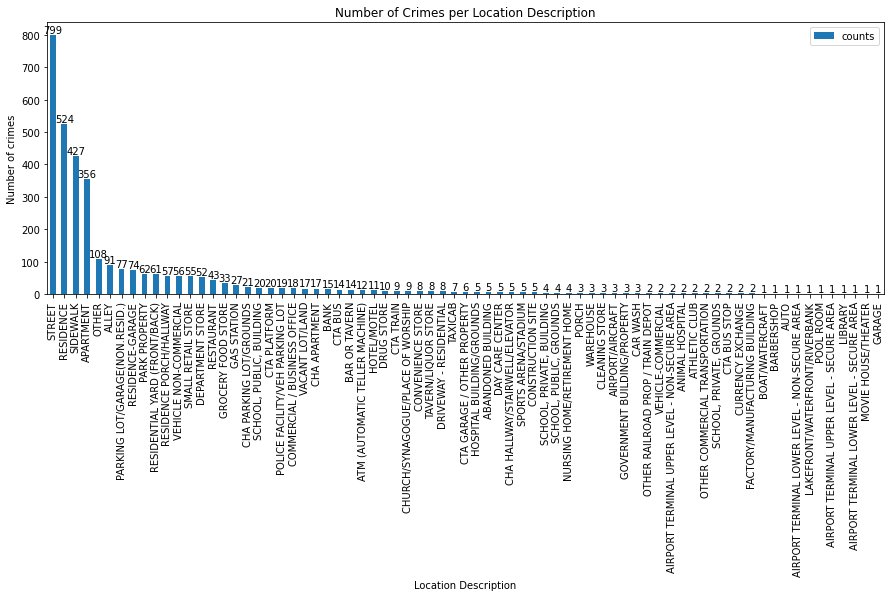

In [5]:
crimes_per_loc_desc = df.groupby('Location_Description').size().reset_index(name='counts')
crimes_per_loc_desc = crimes_per_loc_desc.sort_values('counts', ascending=False)
ax = crimes_per_loc_desc.plot(x='Location_Description', y='counts', kind='bar', figsize=(15,5))
plt.xlabel('Location Description')
plt.ylabel('Number of crimes')
plt.title('Number of Crimes per Location Description')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.show()

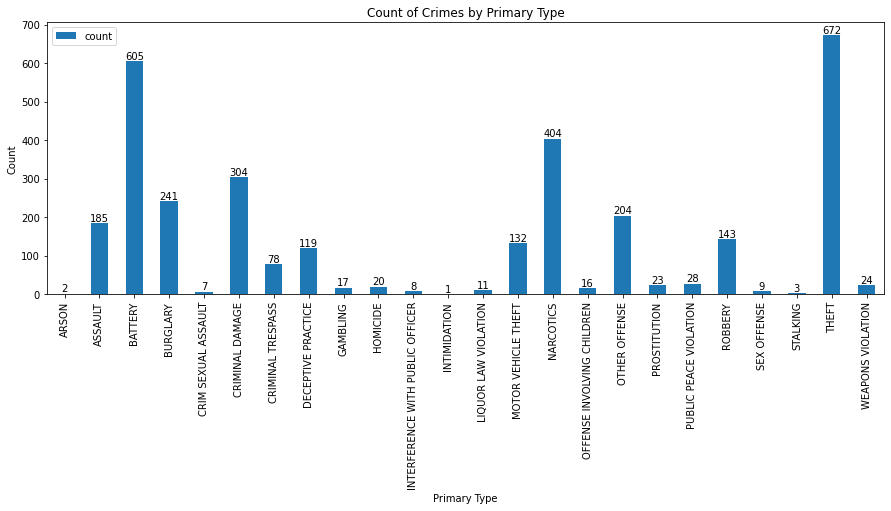

In [6]:
primary_type_counts = df.groupby('Primary_Type').size().reset_index(name='count')

ax = primary_type_counts.plot(x='Primary_Type', y='count', kind='bar', figsize=(15,5))
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Count of Crimes by Primary Type')
plt.xticks(rotation=90)


for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

In [7]:
primary_type_counts.describe()

,count
count,24.000000
mean,135.666667
std,189.589182
min,1.000000
25%,10.500000
50%,26.000000
75%,189.750000
max,672.000000


In [8]:
max_count_primary_type = primary_type_counts.nlargest(1, 'count')['Primary_Type'].iloc[0]
max_count_primary_type

'THEFT'

In [9]:
min_count_primary_type = primary_type_counts.nsmallest(1, 'count')['Primary_Type'].iloc[0]
min_count_primary_type

'INTIMIDATION'

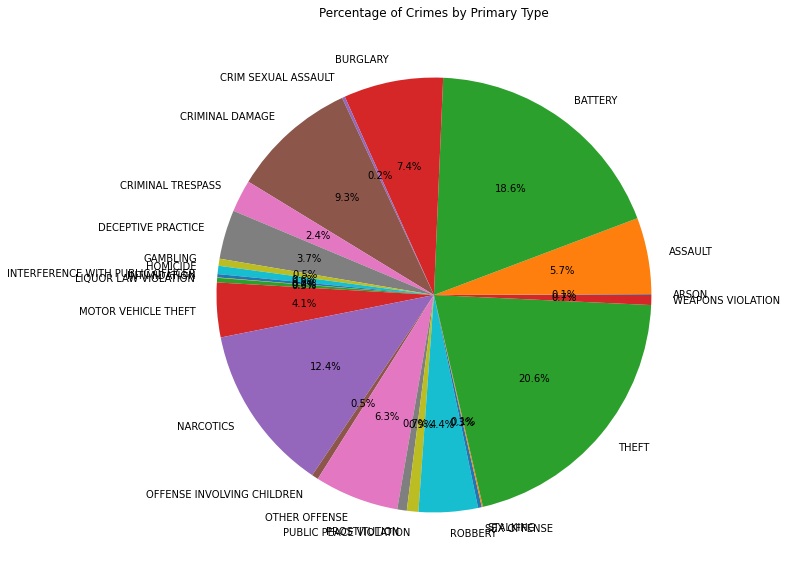

In [10]:
# Create pie chart
plt.figure(figsize=(10,10))
plt.pie(primary_type_counts['count'], labels=primary_type_counts['Primary_Type'], autopct='%1.1f%%')
plt.title('Percentage of Crimes by Primary Type')
plt.show()

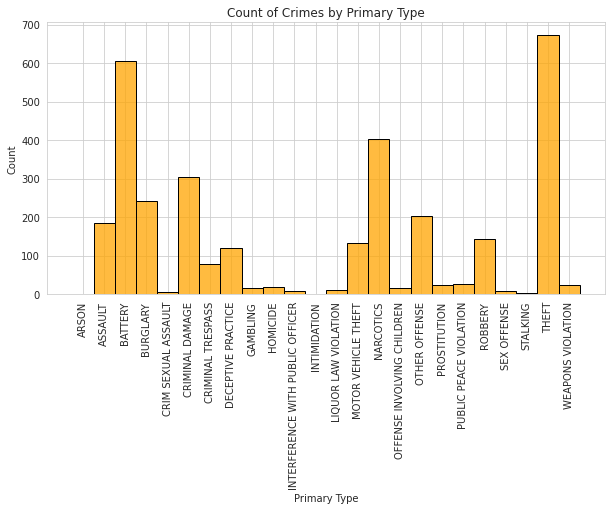

In [11]:
# Create histogram
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.histplot(data=primary_type_counts, x='Primary_Type', weights='count', color='orange', edgecolor='black')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Count of Crimes by Primary Type')
plt.xticks(rotation=90)

plt.show()

In [12]:
# Create profile report
profile = ydata_profiling.ProfileReport(primary_type_counts)

# Display report
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
# Create profile report for whole dataset
profile = ydata_profiling.ProfileReport(df)

# Display report
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]